# Crear un modelo predictivo para predecir la puntuación de un vino

## Imports

In [106]:
# Se requiere Python ≥ 3.5
import sys;
assert sys.version_info >= (3, 5);

# Se requiere Scikit-Learn ≥ 0.20
import sklearn;
assert sklearn.__version__ >= "0.20";

# Otros imports
import numpy as np;
import os;

# lo que sigue, sólo en Google Colab
%matplotlib inline

# Más imports
import matplotlib as mpl;
import matplotlib.pyplot as plt;
import pandas as pd;

## Codigo

### Datos

#### Obtener los datos

In [107]:
df = pd.read_csv(filepath_or_buffer="dataset/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Ver info

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [109]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


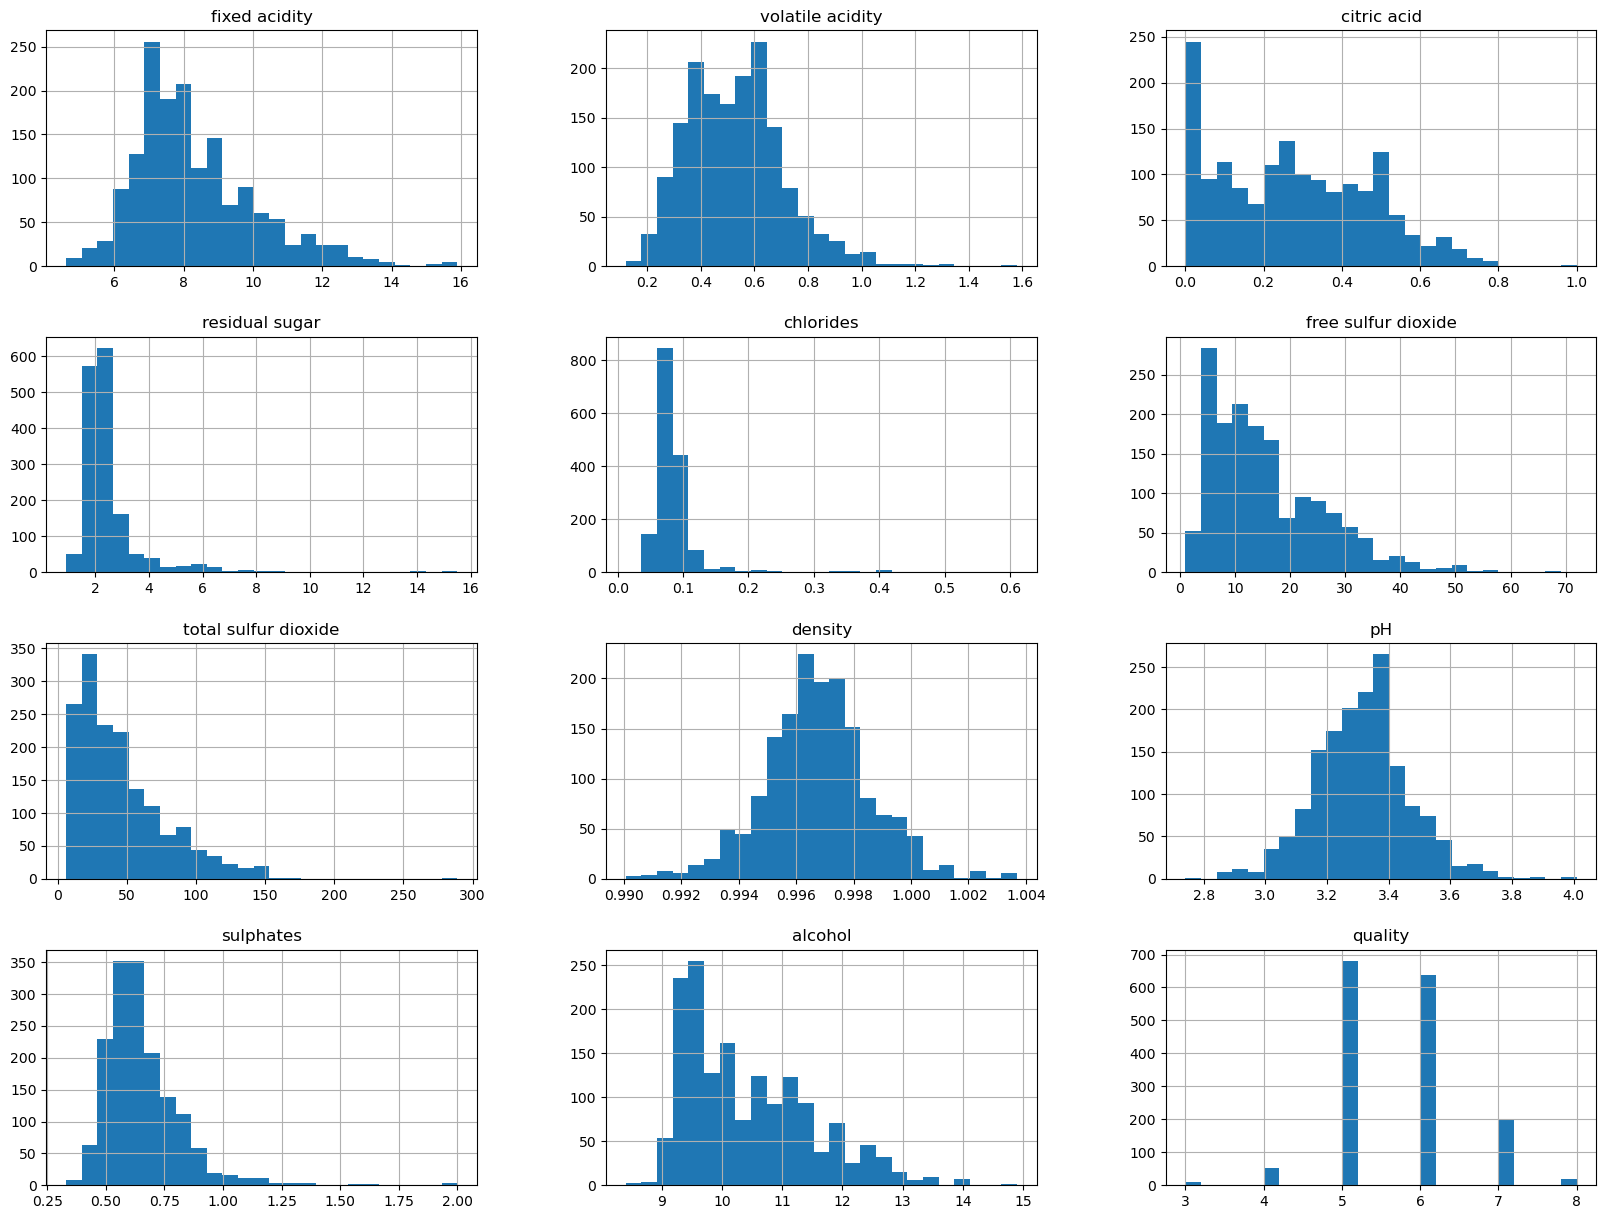

In [110]:
df.hist(bins=25, figsize=(20,15))
plt.show()

## Buscar correlaciones

###  Tabla de correlaciones

In [111]:
corr_matrix = df.corr()
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


### Correlaciones más altas

In [112]:
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

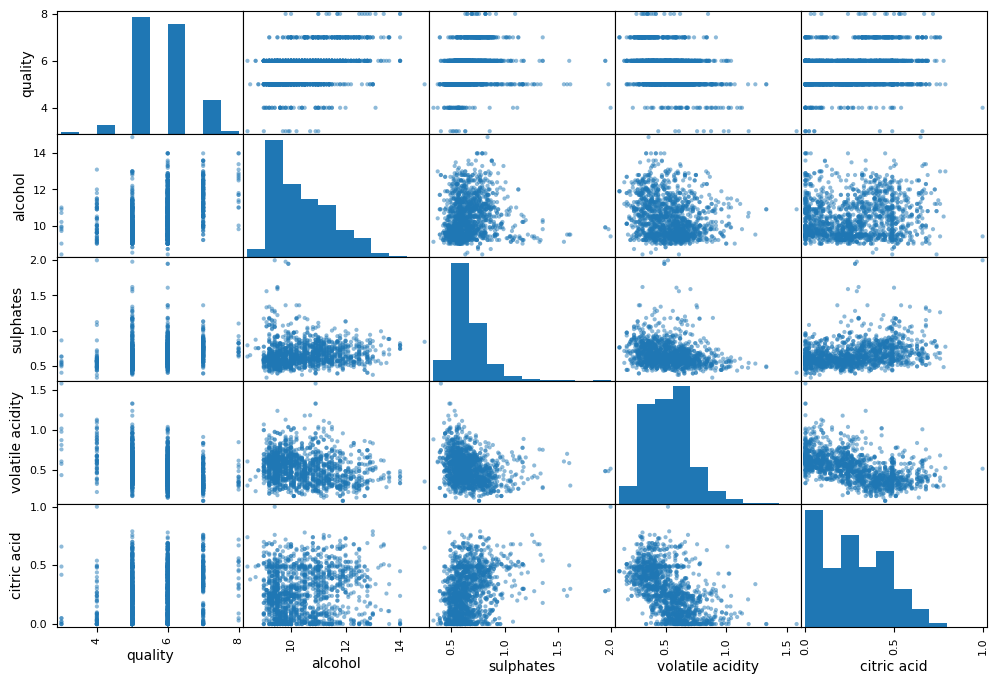

In [113]:
from pandas.plotting import scatter_matrix

attributes = ["quality","alcohol", "sulphates", "volatile acidity","citric acid"]
scatter_matrix(df[attributes], figsize=(12, 8));

* No se entienden las correlaciones por lo que vamos a mostrarlas de otra manera más visual

### Grafico de bigotes

In [114]:
def bigotes(df, atributo):
    boxplots = []
    for i in range(1, 11):
        boxplots.append(
            dict(
                dist=df.query(f"quality == {i}")[atributo],
                label=f'{i}',
                fill_color='gold',
                brush_color='orange'
            )
        )
    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)  # 800x600 px
    for i, boxplot in enumerate(boxplots):
        fcolor, bcolor = boxplot['fill_color'], boxplot['brush_color']
        ax.boxplot(
            boxplot['dist'],
            labels = [boxplot['label']],
            positions = [i],
            widths = [.3],
            notch = True,
            patch_artist = True,
            boxprops = dict(
                edgecolor = bcolor,
                facecolor = fcolor,
                linewidth = 2
            ),
            capprops = dict(color = bcolor, linewidth = 2),
            flierprops = dict(
                color = bcolor,
                markerfacecolor = fcolor,
                linestyle ='none',
                markeredgecolor ='none',
                markersize = 9
            ),
            medianprops = dict(color = bcolor),
            whiskerprops = dict(color = bcolor, linewidth = 1)
            )

        ax.yaxis.grid(color = 'lightgray')
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.spines[:].set_visible(False)
        fig.tight_layout()


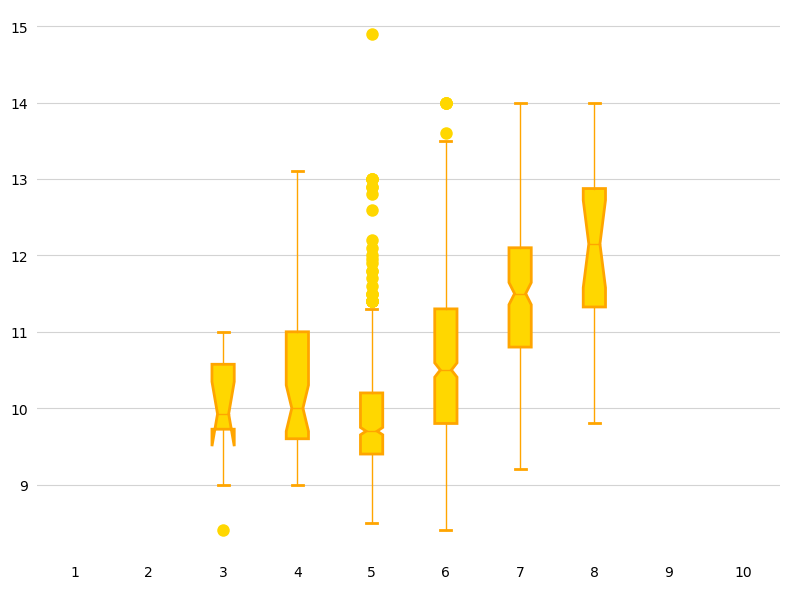

In [115]:
bigotes(df, "alcohol")

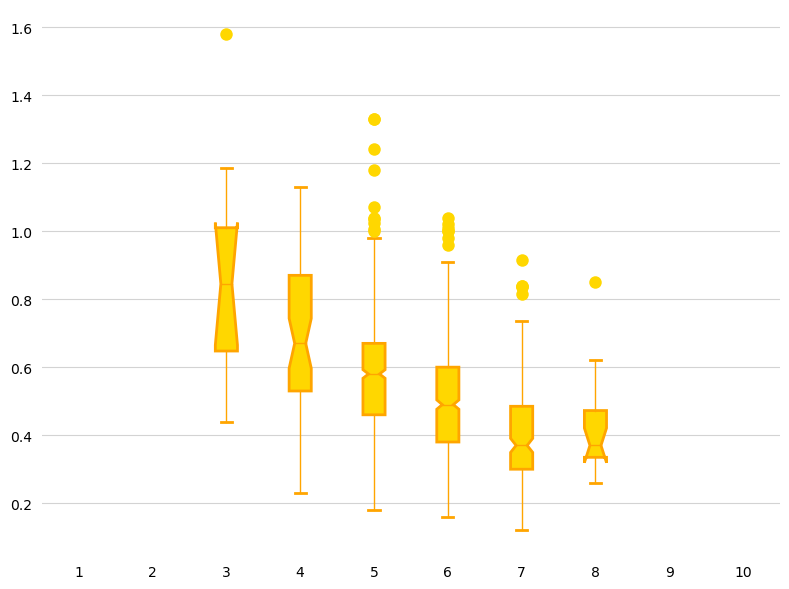

In [116]:
bigotes(df, "volatile acidity")

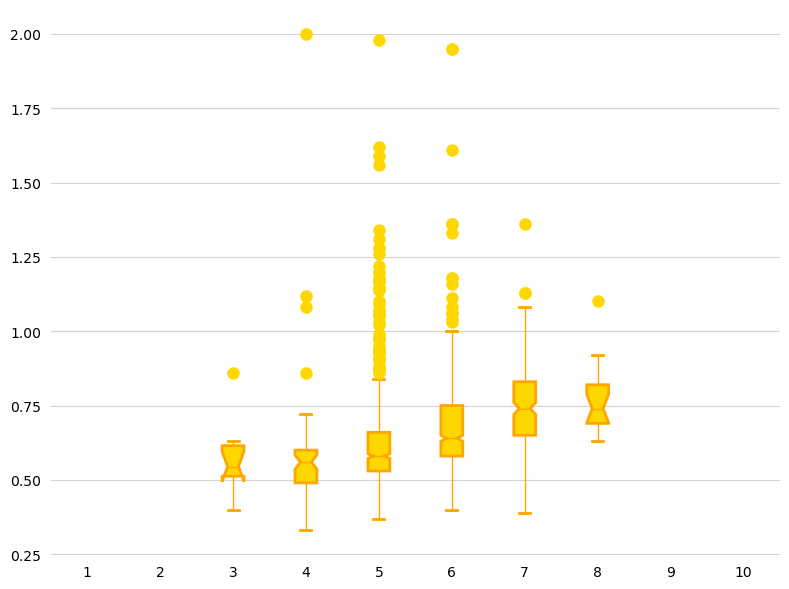

In [117]:
bigotes(df, "sulphates")

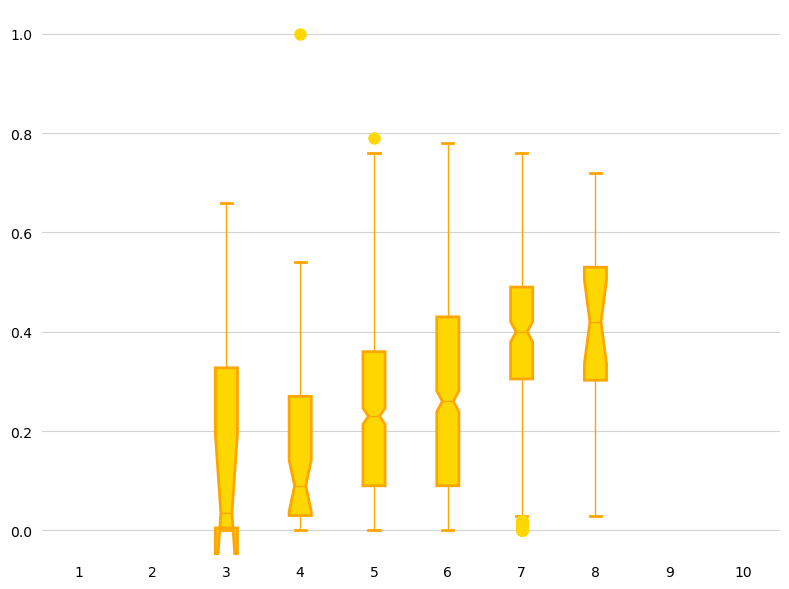

In [118]:
bigotes(df, "citric acid")

### Nuevas Correlaciones

In [119]:
df["volatile_ac_by_alcohol"] = df["alcohol"]/df["volatile acidity"]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,volatile_ac_by_alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,13.428571
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,11.136364
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,12.894737
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,35.000000
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,13.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,17.500000
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,20.363636
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,21.568627
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,15.813953


In [120]:
corr_matrix = df.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                   1.000000
alcohol                   0.476166
volatile_ac_by_alcohol    0.440859
sulphates                 0.251397
citric acid               0.226373
fixed acidity             0.124052
residual sugar            0.013732
free sulfur dioxide      -0.050656
pH                       -0.057731
chlorides                -0.128907
density                  -0.174919
total sulfur dioxide     -0.185100
volatile acidity         -0.390558
Name: quality, dtype: float64

<AxesSubplot: xlabel='quality', ylabel='volatile_ac_by_alcohol'>

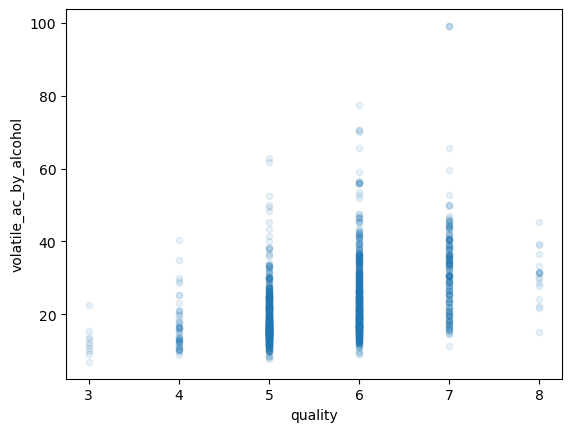

In [121]:
df.plot(kind="scatter",x="quality",y="volatile_ac_by_alcohol",alpha=0.1)

In [122]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,volatile_ac_by_alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,22.597253
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,10.062256
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,6.898734
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,15.637707
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,19.795918
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,26.982861
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,99.166667


Nada relevante

## Crear el Test Set

In [123]:
np.random.seed(42)

In [124]:
def split_train_test(data, test_ratio):
    # https://numpy.org/doc/stable/reference/random/generated/numpy.random.permutation.html
    shuffled_indices = np.random.permutation(len(data)); 
    test_set_size = int(len(data) * test_ratio);
    test_indices = shuffled_indices[:test_set_size];
    train_indices = shuffled_indices[test_set_size:];
    return data.iloc[train_indices], data.iloc[test_indices];

* 80% de los datos para entrenar

In [125]:
X_train, X_test = split_train_test(df, 0.2)
len(X_train)

1280

* 20% de los datos para testear

In [126]:
len(X_test)

319

In [127]:
y_train = X_train["quality"].copy();
X_train = X_train.drop("quality", axis=1);

## Seleccionar y entrenar un modelo

### Regresión Lineal

#### Entrenar

In [128]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [129]:
some_data = X_train.iloc[:5]
print("Predictions:", lin_reg.predict(some_data))

some_labels = y_train.iloc[:5]
print("Labels:", list(some_labels))

Predictions: [5.18651828 5.68552146 6.04241871 5.69557435 5.11050626]
Labels: [4, 6, 6, 6, 5]


#### Error

In [130]:
from sklearn.metrics import mean_squared_error

predictions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.6518690863193566

In [131]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_train, predictions)
lin_mae

0.5001874132709432

### Decision Tree

#### Entrenar

In [132]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

#### Testear

In [133]:
predictions = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [134]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [135]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.79549513 0.92702481 0.77055175 0.77055175 0.82443162 0.8291562
 0.73420876 0.833854   0.625      0.875     ]
Mean: 0.7985274022232292
Standard deviation: 0.07812802249270841


### Random Forest

#### Entrenar

In [136]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#### Testear

In [137]:
predictions = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.221056059066473

In [138]:
forest_scores = cross_val_score(forest_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.60210633 0.67387058 0.62770228 0.56842985 0.60726076 0.63616895
 0.55875559 0.66478674 0.44863508 0.561369  ]
Mean: 0.5949085173656242
Standard deviation: 0.06215238101500798


### Support Vector regression

In [139]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train, y_train)
predictions = svm_reg.predict(X_train)
svm_mse = mean_squared_error(y_train, predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

0.6586374872694342

### XGBoost

In [140]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_reg.fit(X_train, y_train)
predictions = xgb_reg.predict(X_train)
xgb_mse = mean_squared_error(y_train, predictions)
xgb_rmse = np.sqrt(xgb_mse)
xgb_rmse


0.04480027359896193

#### Testear

In [141]:
xgb_scores = cross_val_score(xgb_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
xgb_rmse_scores = np.sqrt(-xgb_scores)
display_scores(xgb_rmse_scores)

Scores: [0.61070388 0.68218138 0.63414219 0.57025764 0.59463148 0.67311748
 0.57370647 0.70956825 0.5337114  0.55359313]
Mean: 0.613561329878451
Standard deviation: 0.056301746499823634


## Evaluar el modelo con test set

In [142]:
y_test = X_test["quality"].copy()
X_test = X_test.drop("quality", axis=1)

median = X_test["alcohol"].median()
X_test["alcohol"].fillna(median, inplace=True)

In [143]:
predictions = tree_reg.predict(X_test)

final_mse = mean_squared_error(y_test, predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

some_data = X_test.iloc[:5]
print("Predictions:", predictions[:5])

some_labels = y_test.iloc[:5]
print("Labels:", list(some_labels))

Predictions: [6. 6. 6. 4. 6.]
Labels: [6, 5, 6, 5, 6]
